In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv


In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv('/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv')

In [4]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


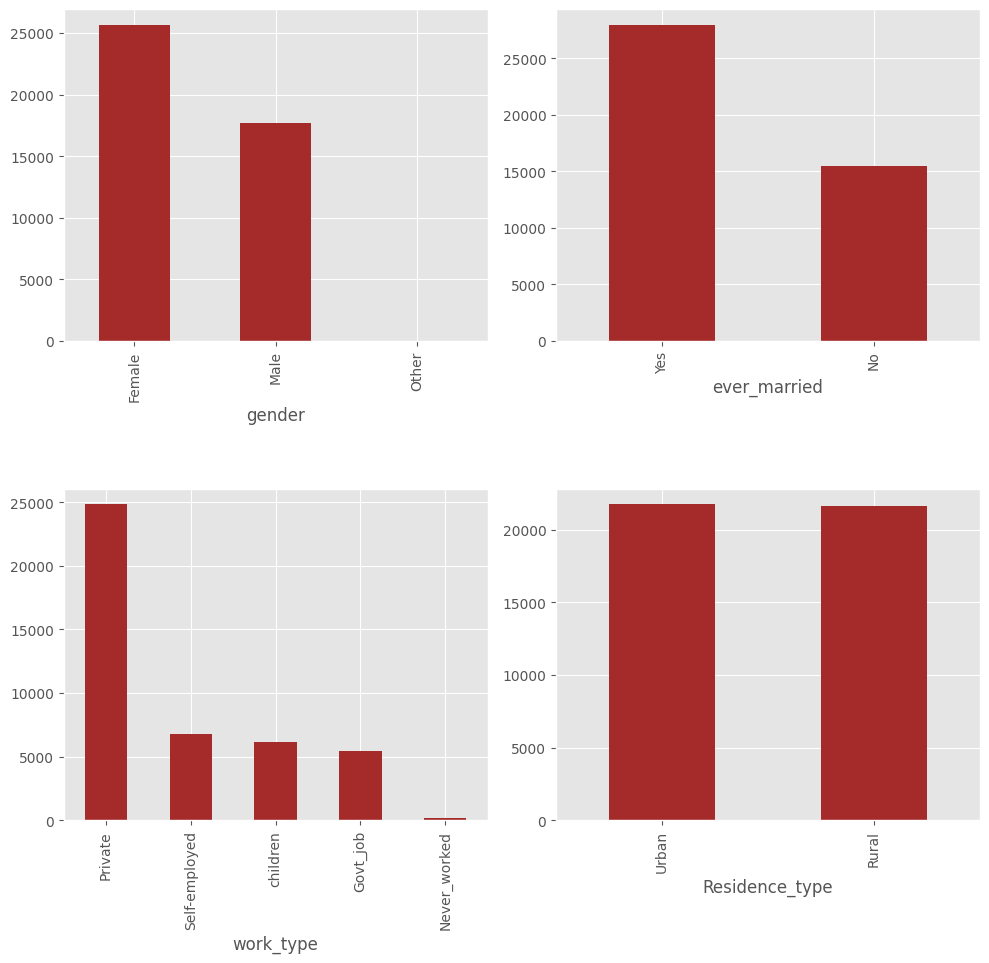

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10,18))

plt.subplot(421)
df['gender'].value_counts().plot(kind='bar', 
                                 color = 'brown')

plt.subplot(422)
df['ever_married'].value_counts().plot(kind='bar', 
                                       color = 'brown')

plt.subplot(423)
df['work_type'].value_counts().plot(kind='bar', 
                                    color = 'brown')

plt.subplot(424)
df['Residence_type'].value_counts().plot(kind='bar', 
                                         color = 'brown')
plt.tight_layout()

In [7]:
fig = px.pie(df, values='heart_disease', 
             names = 'work_type', 
             title = 'Heart Disease by Work Type',
             hover_data = ['gender'],
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()

In [8]:
fig = px.pie(df, values='hypertension', 
             names = 'work_type', 
             title = 'Hypertension by Work type',
             hover_data = ['avg_glucose_level'],
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()

In [9]:
fig = px.pie(df, values='hypertension', 
             names = 'ever_married', 
             title = 'Marital status by Hypertension',
             hover_data = ['gender'],
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()

In [10]:
fig = px.pie(df, values='stroke', 
             names = 'work_type', 
             title = 'work type by stroke',
             hover_data = ['Residence_type'],
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()

In [11]:
fig = px.pie(df, values='stroke', 
             names = 'ever_married', 
             title = 'Marital status by stroke',
             hover_data = ['Residence_type'],
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()

<Axes: xlabel='gender', ylabel='age'>

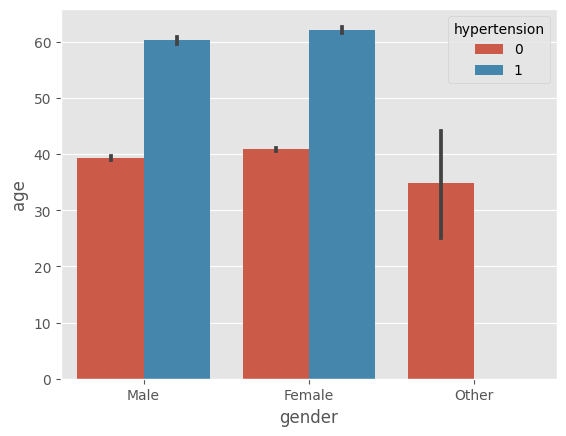

In [12]:
sns.barplot(x = 'gender', y='age', 
            data = df, hue = 'hypertension')

<Axes: xlabel='gender', ylabel='age'>

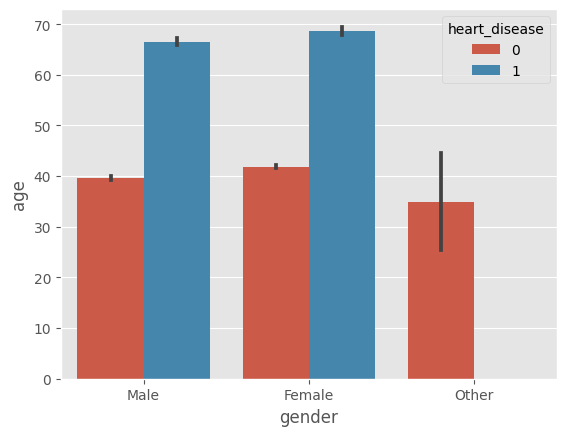

In [13]:
sns.barplot(x = 'gender', y='age', 
            data = df, hue = 'heart_disease')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='age', ylabel='avg_glucose_level'>

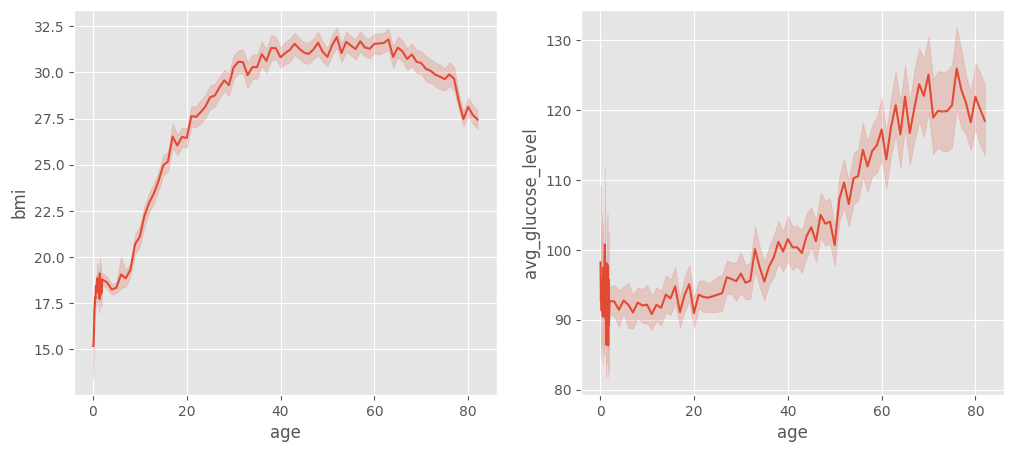

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.lineplot(data=df, x='age', y='bmi')

plt.subplot(122)
sns.lineplot(data=df, x='age', y='avg_glucose_level')

In [15]:
px.density_heatmap(x = 'age', y = 'bmi', 
                   data_frame=df, width=550, height=450)

In [16]:
px.density_heatmap(x = 'age', y = 'avg_glucose_level', 
                   data_frame=df, width=550, height=450)

In [17]:
#sns.boxplot(x = 'gender', y = 'age', data = df)
fig =px.box(df, x = 'gender', 
            y='age',
            color_discrete_sequence=['indianred'])
fig.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [18]:
fig = px.box(df, x = 'ever_married', 
             y='age',
             color_discrete_sequence=['indianred'])
fig.show()

In [19]:
fig =px.box(df, x = 'stroke', 
            y='avg_glucose_level',
            color_discrete_sequence=['indianred'])
fig.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [20]:
fig =px.box(df, x = 'hypertension', 
            y='avg_glucose_level',
            color_discrete_sequence=['indianred'])
fig.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [21]:
fig = px.histogram(df,  x = 'bmi',
                   nbins = 40,
                  color_discrete_sequence=['indianred'])
fig.show()

In [22]:
fig = px.histogram(df,  
                   x = 'avg_glucose_level',
                   nbins = 40,
                   color_discrete_sequence=['indianred'])
fig.show()

In [23]:
df_ = df[['age', 'bmi', 'avg_glucose_level']]
corr = df_.corr()
px.imshow(corr, text_auto=True)

## Data Processing

In [24]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [25]:
cols = ['bmi']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [26]:
from sklearn.preprocessing import LabelEncoder
cols = ['ever_married', 'Residence_type','work_type', 
        'gender','smoking_status']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [27]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0  30669       1   3.0             0              0             0          4   
1  30468       1  58.0             1              0             1          2   
2  16523       0   8.0             0              0             0          2   
3  56543       0  70.0             0              0             1          2   
4  46136       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0              95.12  18.0               3       0  
1               1              87.96  39.2               1       0  
2               1             110.89  17.6               3       0  
3               0              69.04  35.9               0       0  
4               0             161.28  19.1               3       0

In [28]:
df['smoking_status'].value_counts()

smoking_status
1    16053
3    13292
0     7493
2     6562
Name: count, dtype: int64

<Axes: >

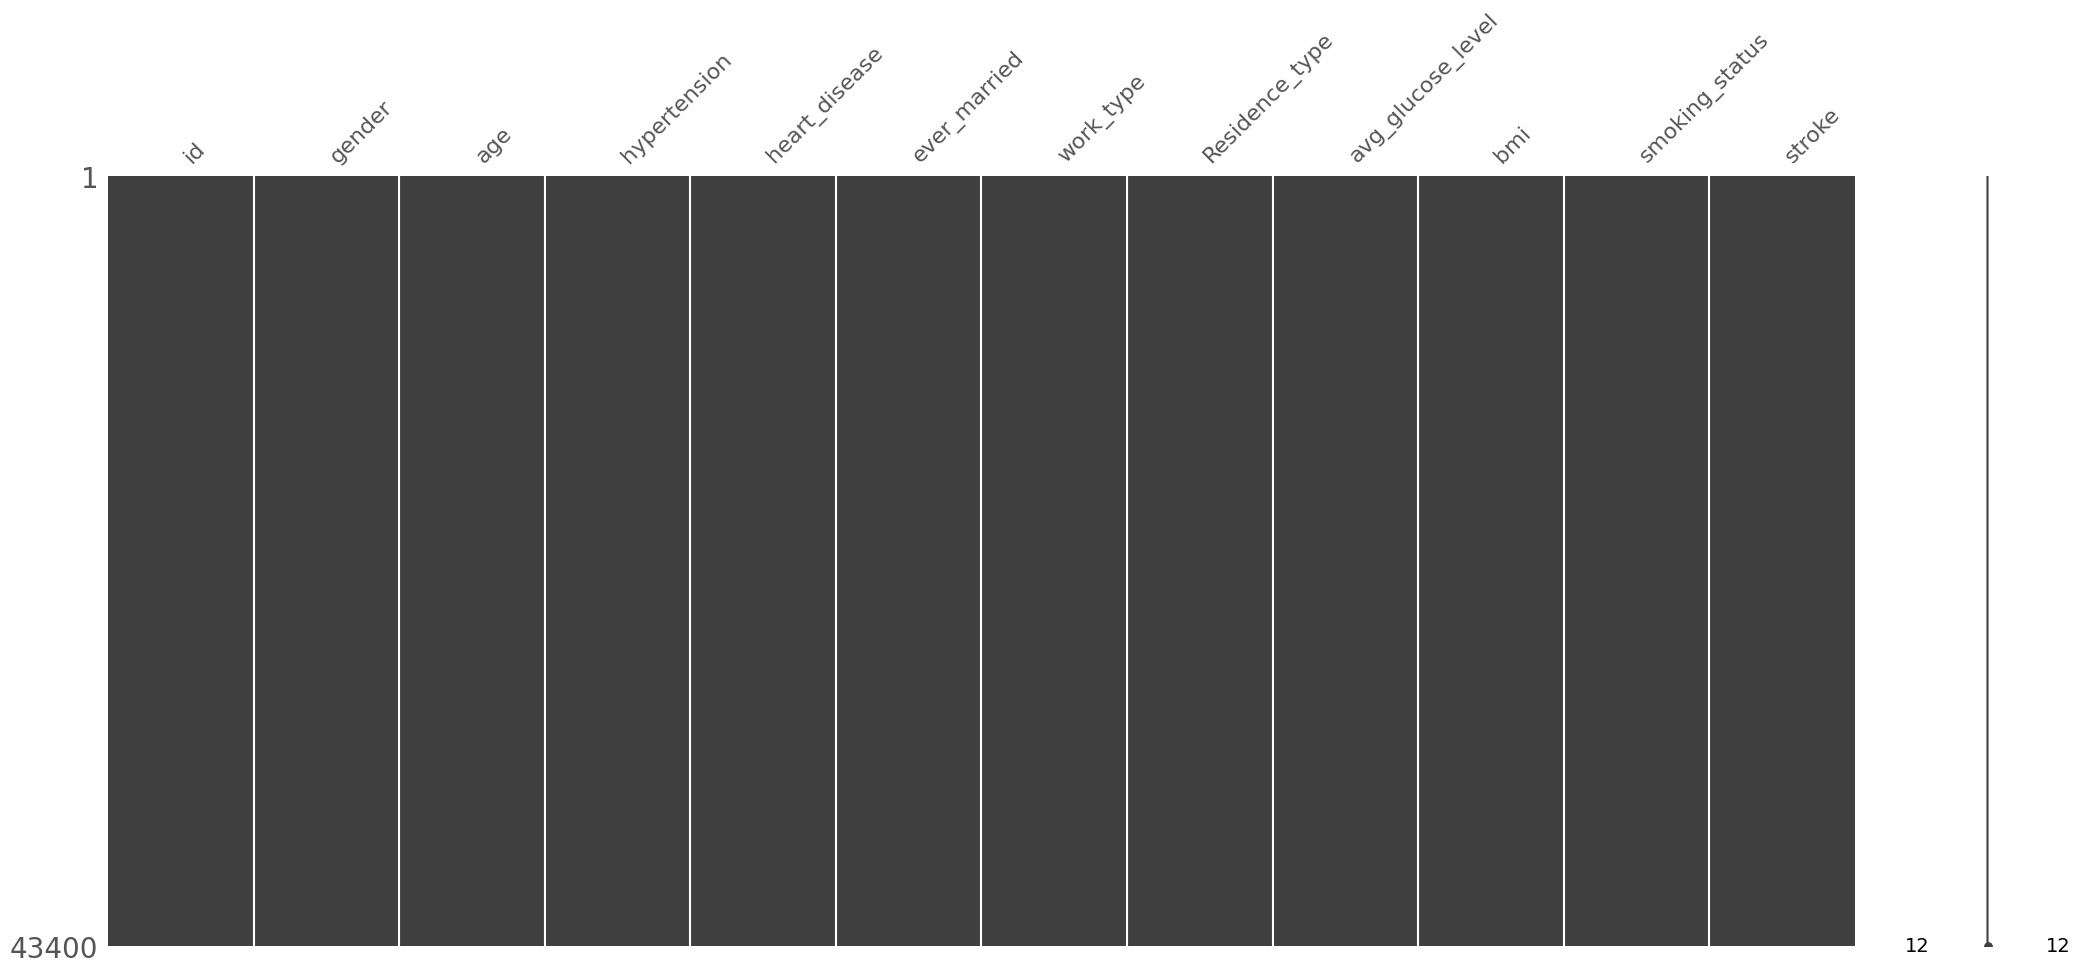

In [29]:
msno.matrix(df)

In [30]:
X = df.iloc[:, 1:-1]
#X.head()

In [31]:
y = df['stroke']

In [32]:
X.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1   3.0             0              0             0          4   
1       1  58.0             1              0             1          2   
2       0   8.0             0              0             0          2   
3       0  70.0             0              0             1          2   
4       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               0              95.12  18.0               3  
1               1              87.96  39.2               1  
2               1             110.89  17.6               3  
3               0              69.04  35.9               0  
4               0             161.28  19.1               3

## Feature Selection
* ### 1. Based on additively adding features until the score does not improve
* ### 2. Using Recursive Feature Elimination

In [33]:
'''
class GreedyFeatureSelection: 
    
    
    def evaluate_score(self, X, y):
        model = RandomForestClassifier()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y, predictions)
        return auc

    def _feature_selection(self, X, y):
        good_features = []
        best_scores = []
    
        num_features = X.shape[1]
    
        while True:
            this_feature = None
            best_score = 0
        
            for feature in range(num_features):
                if feature in good_features:
                    continue
                selected_features = good_features + [feature]
                xtrain = X[:, selected_features]
                score = self.evaluate_score(xtrain, y)
            
                if score > best_score:
                    this_feature = feature
                    best_score = score
                if this_feature != None:
                    good_features.append(this_feature)
                    best_scores.append(best_score)
                if len(best_scores) > 2:
                     if best_scores[-1] < best_scores[-2]:
                            break
        return best_scores[:-1], good_features[:-1]

    def __call__(self, X, y):
        scores, features = self._feature_selection(X, y)
        return X[:, features], scores
'''

'\nclass GreedyFeatureSelection: \n    \n    \n    def evaluate_score(self, X, y):\n        model = RandomForestClassifier()\n        model.fit(X, y)\n        predictions = model.predict_proba(X)[:, 1]\n        auc = roc_auc_score(y, predictions)\n        return auc\n\n    def _feature_selection(self, X, y):\n        good_features = []\n        best_scores = []\n    \n        num_features = X.shape[1]\n    \n        while True:\n            this_feature = None\n            best_score = 0\n        \n            for feature in range(num_features):\n                if feature in good_features:\n                    continue\n                selected_features = good_features + [feature]\n                xtrain = X[:, selected_features]\n                score = self.evaluate_score(xtrain, y)\n            \n                if score > best_score:\n                    this_feature = feature\n                    best_score = score\n                if this_feature != None:\n                    go

In [34]:
#X_transformed, scores = GreedyFeatureSelection()(X, y)

### Recursive Feature Elimination

In [35]:
model = RandomForestClassifier()
rfe = RFE(
          estimator = model,
          n_features_to_select = 8)

rfe.fit(X, y)
X_transformed = rfe.transform(X)

In [36]:
X_transformed

array([[  1.  ,   3.  ,   0.  , ...,  95.12,  18.  ,   3.  ],
       [  1.  ,  58.  ,   1.  , ...,  87.96,  39.2 ,   1.  ],
       [  0.  ,   8.  ,   0.  , ..., 110.89,  17.6 ,   3.  ],
       ...,
       [  0.  ,  82.  ,   1.  , ...,  91.94,  28.9 ,   0.  ],
       [  1.  ,  40.  ,   0.  , ...,  99.16,  33.2 ,   1.  ],
       [  0.  ,  82.  ,   0.  , ...,  79.48,  20.6 ,   1.  ]])

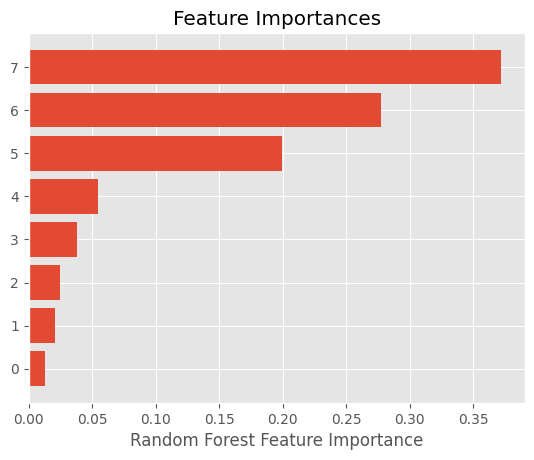

<Figure size 640x480 with 0 Axes>

In [37]:
model.fit(X_transformed, y)
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)))
plt.xlabel('Random Forest Feature Importance')
plt.show()
plt.tight_layout()

## Hyperparameter Optimization Grid Search

In [38]:
from sklearn import model_selection

param_grid = {
 "n_estimators": [100, 200, 300, 400, 500],
 "max_depth": [1, 2, 5, 11, 15],
 "criterion": ["gini", "entropy"]
 }

model = model_selection.GridSearchCV(
 estimator=model, 
 param_grid=param_grid, 
 scoring="accuracy",
 verbose=10, 
 n_jobs=1,
 cv=3
 )

In [39]:
model.fit(X,y)
print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/3; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.982 total time=   0.9s
[CV 2/3; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/3; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.982 total time=   0.8s
[CV 3/3; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/3; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.982 total time=   0.8s
[CV 1/3; 2/50] START criterion=gini, max_depth=1, n_estimators=200..............
[CV 1/3; 2/50] END criterion=gini, max_depth=1, n_estimators=200;, score=0.982 total time=   1.6s
[CV 2/3; 2/50] START criterion=gini, max_depth=1, n_estimators=200..............
[CV 2/3; 2/50] END criterion=gini, max_depth=1, n_estimators=200;, score=0.982 total time=   1.7s
[CV 3/3; 2/50] START criterion=gini, max_de

## Prediction

In [40]:
rf = RandomForestClassifier(
     criterion = 'gini',
     max_depth = 1,
     n_estimators = 100)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, stratify = y)

In [42]:
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.01228199, 0.01448663, 0.01436549, ..., 0.01108962, 0.01448663,
       0.01448663])

In [43]:
roc_auc_score(y_test, y_pred)

0.8445943572693148

In [44]:
y_preds = []
for y in y_pred:
    if y < 0.5:
        y_preds.append(0)
    else:
        y_preds.append(1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9819124423963134

## ROC Curve

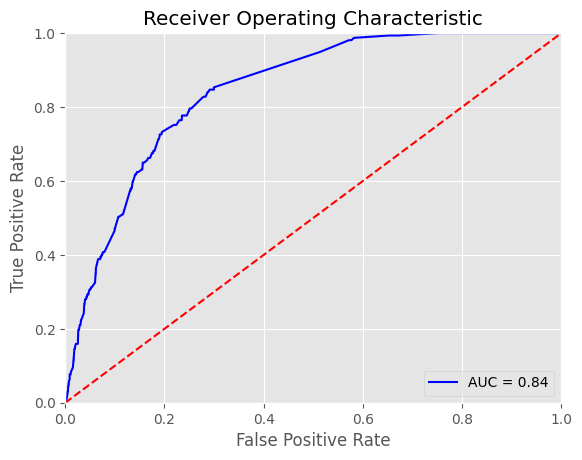

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
